In [47]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt

os.getcwd()

'/Users/chasedawson/dev/uva_equity_center/summer-sandbox/nfhl/scripts'

In [49]:
# read in data
fhl = {}
geoms = {}
spatial_units = ['counties', 'tracts', 'blkgps', 'blocks']
for sp in spatial_units:
    fhl[sp] = pd.read_csv('../data/nfhl_eastshore_{sp}.csv'.format(sp = sp), index_col = 2)
    fhl[sp] = fhl[sp].drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
    
    geoms[sp] = gpd.read_file('../../spatial_units/data/clipped_coast/eastshore_{sp}_clipped_coast.shp'.format(sp = sp))
    geoms[sp] = geoms[sp].drop(columns=["MTFCC", "CSAFP", "CBSAFP", "METDIVFP", "FUNCSTAT", "ALAND", "AWATER", "INTPTLAT", "INTPTLON"], errors='ignore')
    geoms[sp] = geoms[sp].set_index('GEOID')

In [50]:
for sp in spatial_units:
    geoms[sp].index = geoms[sp].index.astype(int)

In [51]:
fhl_geom = {}
for sp in spatial_units:
    fhl_geom[sp] = geoms[sp].merge(fhl[sp], on='GEOID')

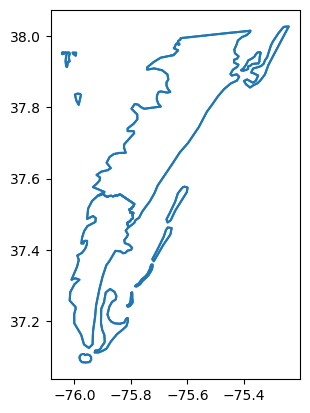

In [52]:
fhl_geom['counties'].boundary.plot()
plt.show()

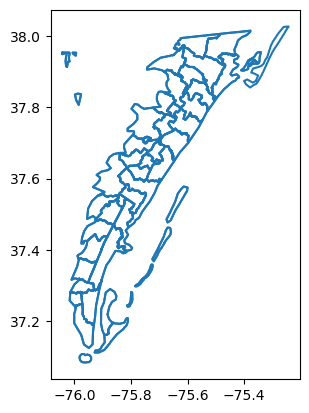

In [53]:
fhl_geom['blkgps'].boundary.plot()
plt.show()

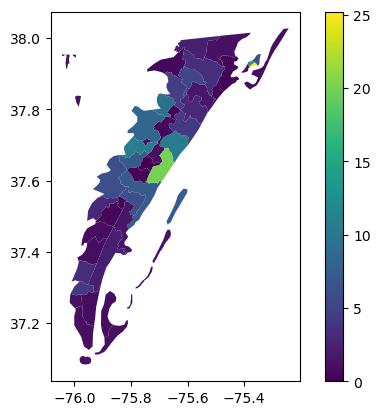

In [59]:
fhl_geom['blkgps'][fhl_geom['blkgps'].zone == '0.2 PCT ANNUAL CHANCE FLOOD HAZARD'].plot("perc", legend = True)
plt.show()

In [71]:
# what are the possible flood zones?
fld_zones = fhl_geom['counties'].zone.value_counts().index.tolist()
fld_zones

['0.2 PCT ANNUAL CHANCE FLOOD HAZARD', 'AREA OF MINIMAL FLOOD HAZARD']

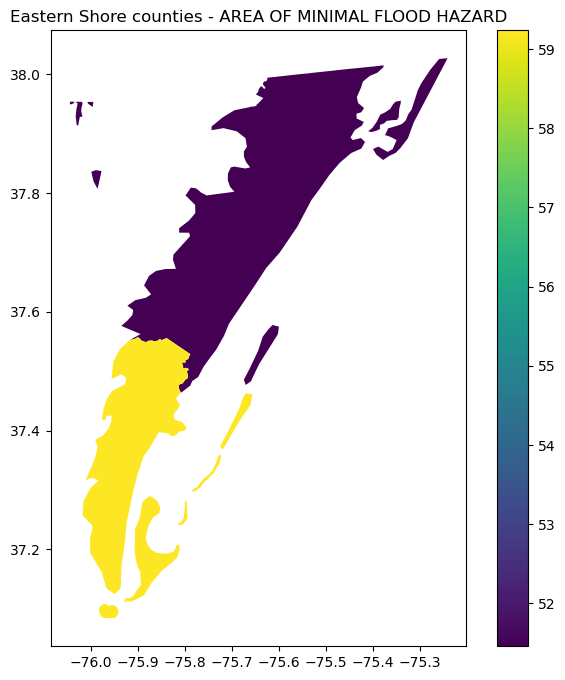

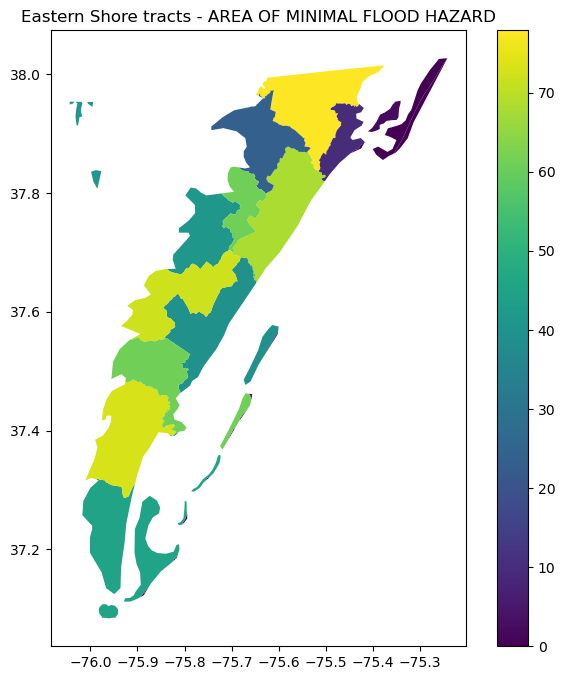

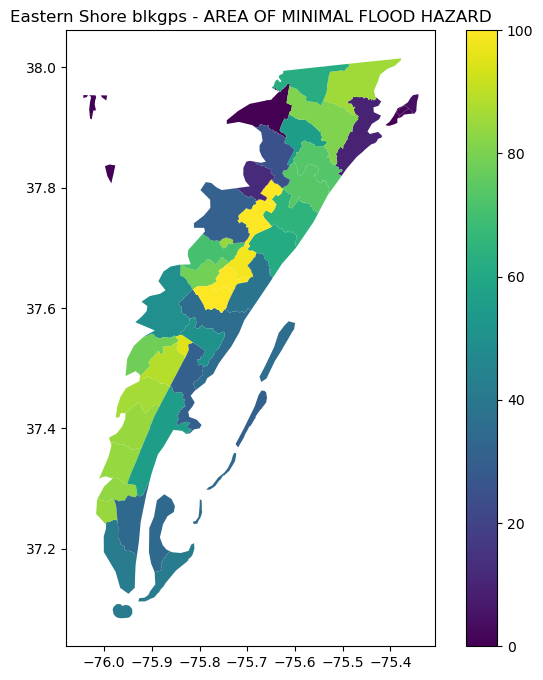

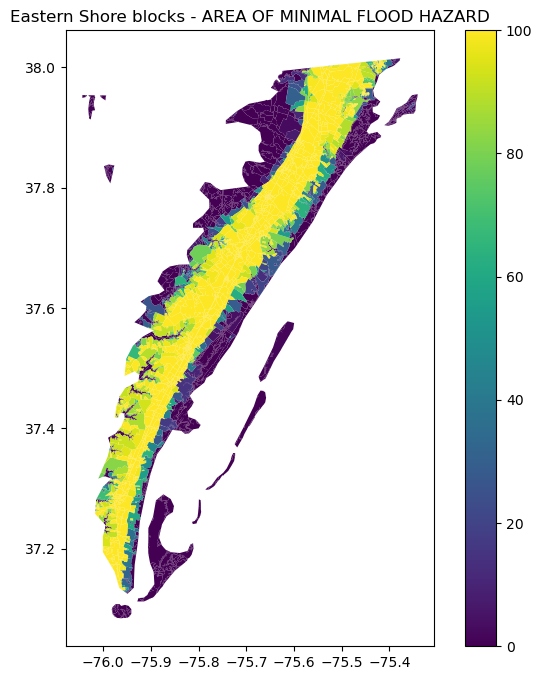

In [78]:
for sp in spatial_units:
    fhl_geom[sp][fhl_geom[sp].zone == fld_zones[-1]].plot('perc', legend = True, figsize=(8,8))
    plt.title("Eastern Shore {sp} - {zone}".format(sp = sp, zone = fld_zones[-1]))
    plt.show()

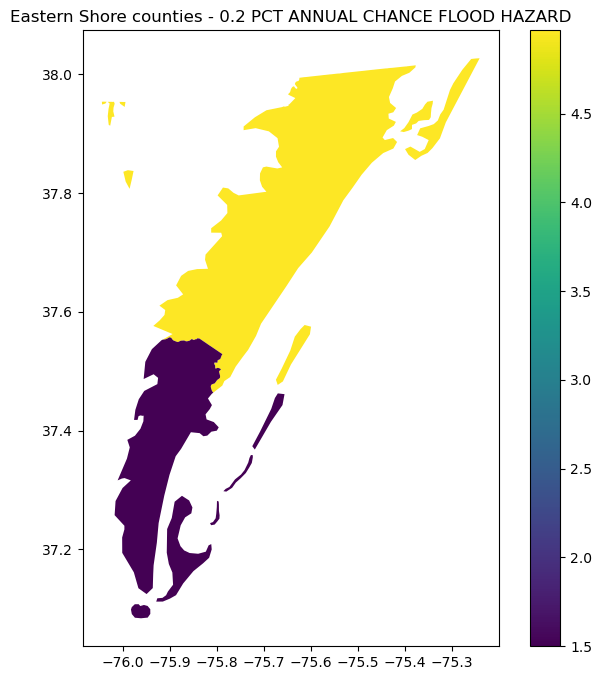

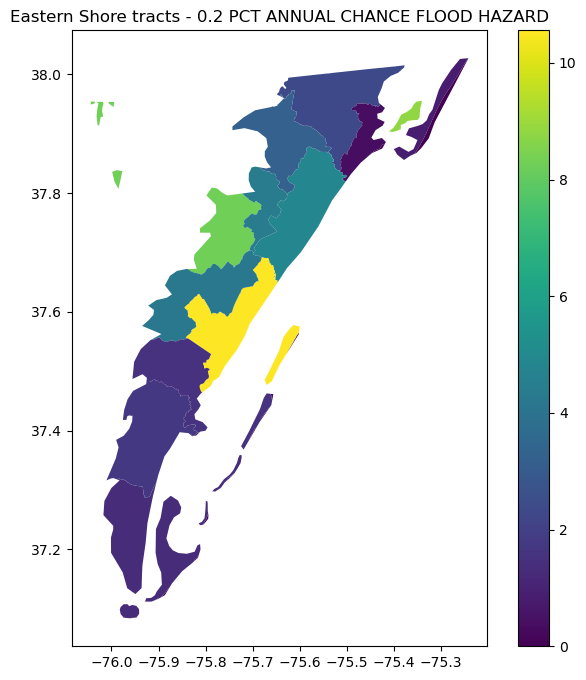

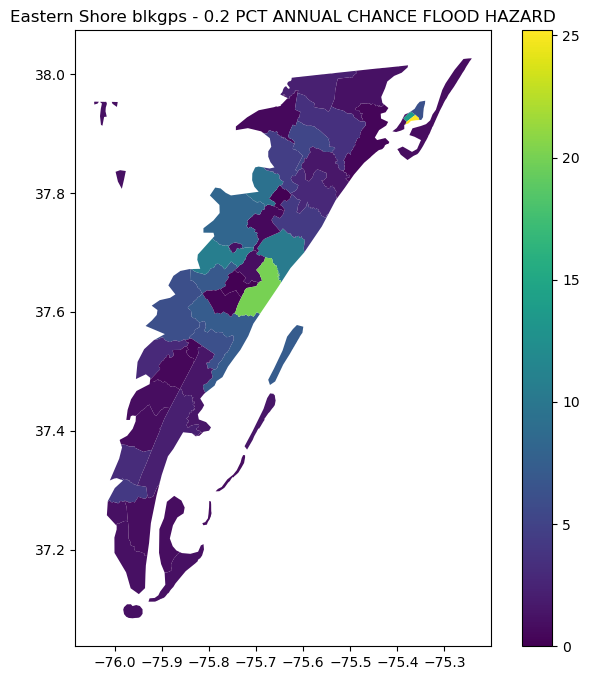

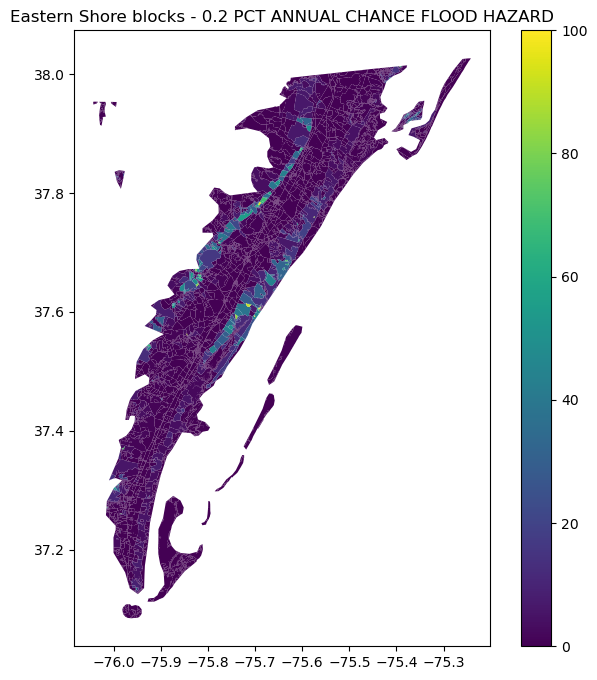

In [80]:
for sp in spatial_units:
    fhl_geom[sp][fhl_geom[sp].zone == fld_zones[0]].plot('perc', legend = True, figsize=(8,8))
    plt.title("Eastern Shore {sp} - {zone}".format(sp = sp, zone = fld_zones[0]))
    plt.show() 